In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## №1 Загрузка данных

In [4]:
%%time
#загрузка данных
tax_data = pd.read_csv('yellow_tripdata_2016-05.csv',','
                        ,parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])
tax_data['region']=int(-1)
#смотрим заголовок
tax_data.head()

Wall time: 39.8 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,-1
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,-1
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,-1
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,-1
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,-1


In [5]:
#узнаем количество записей
len(tax_data.index)

11836853

## №2 Проведение фильтрации

In [6]:
%%time
#зададим прямоугольник Нью-Йорка для удаления
NY_west = -74.25559
NY_east = -73.70001
NY_south = 40.49612
NY_north = 40.91553

#1 удалим поездки с нулевой длительностью
tax_data.drop(tax_data[tax_data.tpep_pickup_datetime == tax_data.tpep_dropoff_datetime].index, inplace = True)
#2 удалим поездки без пассажиров
tax_data.drop(tax_data[tax_data.passenger_count == 0].index, inplace = True)
#3 удалим поездки с нулевым расстоянием по счетчику
tax_data.drop(tax_data[tax_data.trip_distance == 0].index, inplace = True)

#4 удалим поездки, если хотя бы одна из координат выходит за пределы Нью-Йорка
tax_data.drop(tax_data[tax_data.pickup_longitude < NY_west].index, inplace = True)
tax_data.drop(tax_data[tax_data.pickup_longitude > NY_east].index, inplace = True)
tax_data.drop(tax_data[tax_data.pickup_latitude < NY_south].index, inplace = True)
tax_data.drop(tax_data[tax_data.pickup_latitude > NY_north].index, inplace = True)

#узнаем количество записей после всех удалений
len(tax_data.index)

Wall time: 21.3 s


11626521

In [7]:
%%time
#теперь отбросим минуты и секунды у времени поездки, чтобы остались только часы, как того требует задание
tax_data.tpep_pickup_datetime = tax_data.tpep_pickup_datetime.dt.floor(freq='h')
tax_data.tpep_dropoff_datetime = tax_data.tpep_dropoff_datetime.dt.floor(freq='h')
tax_data.head()

Wall time: 758 ms


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,1,2016-05-01,2016-05-01,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,-1
1,2,2016-05-01,2016-05-01,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,-1
2,2,2016-05-01,2016-05-01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,-1
3,2,2016-05-01,2016-05-01,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,-1
4,2,2016-05-01,2016-05-01,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,-1


In [8]:
#теперь загрузим файл с разбитием прямоугольника на ячейки (регионы)
regions = pd.read_csv('regions.csv',';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [9]:
%%time
#прописываем регионы в изначальный dataframe
for i,row in regions.iterrows():
        sub_index = tax_data[(tax_data.pickup_longitude>=row['west'])&
                             (tax_data.pickup_longitude<=row['east'])&
                             (tax_data.pickup_latitude>=row['south'])&
                             (tax_data.pickup_latitude<=row['north'])
                            ].index
        if len(sub_index)>0:
            tax_data.loc[sub_index,'region'] = row['region']
        if (i%100)==0:
            print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
Wall time: 7min 44s


In [10]:
tax_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,1,2016-05-01,2016-05-01,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233.0
1,2,2016-05-01,2016-05-01,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180.0
2,2,2016-05-01,2016-05-01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180.0
3,2,2016-05-01,2016-05-01,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173.0
4,2,2016-05-01,2016-05-01,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130.0


In [13]:
#сохраним в файл, надоело пересчитывать постоянно
tax_data[['tpep_pickup_datetime','region']].to_csv('proc_2016-05.csv')

In [19]:
#считаем обратно
tax_data = pd.read_csv('proc_2016-05.csv',parse_dates=['tpep_pickup_datetime'])
del tax_data['Unnamed: 0']

In [20]:
tax_data.head()

,tpep_pickup_datetime,region
0,2016-05-01,1233.0
1,2016-05-01,1180.0
2,2016-05-01,1180.0
3,2016-05-01,1173.0
4,2016-05-01,1130.0


## №3 Агрегация данных по часам и областям

In [21]:
%%time
#делаем агрегацию
tax_data['cnt']=1
pre_res = tax_data[['tpep_pickup_datetime','region','cnt']].groupby(['tpep_pickup_datetime','region']).sum()

pre_res

Wall time: 1.29 s


cnt
tpep_pickup_datetime region     
2016-05-01 00:00:00  1015.0    1
                     1017.0    1
                     1029.0    3
                     1030.0    1
                     1033.0    4
...                          ...
2016-05-31 23:00:00  2069.0   17
                     2070.0    1
                     2118.0  192
                     2119.0   77
                     2168.0  132

[141762 rows x 1 columns]

In [22]:
#формируем список часов
hrs = tax_data.tpep_pickup_datetime.unique()
hrs.sort()
print(len(hrs)) #744 = 31*24 - значит есть все часы в мае

744


In [23]:
%%time 

#сформируем таблицу-заготовку
h = hrs[0]
blank_table = pd.DataFrame({'tpep_pickup_datetime':[h],'region':[0]})
blank_table.drop([0],inplace=True)
#заполняем таблицу-заготовку
for h in hrs:
    tmp_table =  pd.DataFrame({'tpep_pickup_datetime': [h]*2500
                              ,'region': np.arange(1,2501)
                              })
    blank_table = blank_table.append(tmp_table)
blank_table

Wall time: 11.2 s


,tpep_pickup_datetime,region
0,2016-05-01 00:00:00,1
1,2016-05-01 00:00:00,2
2,2016-05-01 00:00:00,3
3,2016-05-01 00:00:00,4
4,2016-05-01 00:00:00,5
...,...,...
2495,2016-05-31 23:00:00,2496
2496,2016-05-31 23:00:00,2497
2497,2016-05-31 23:00:00,2498
2498,2016-05-31 23:00:00,2499


In [24]:
#создаем индекс для таблицы-заготовки
blank_table.set_index(['tpep_pickup_datetime','region'],inplace=True)
blank_table

Empty DataFrame
Columns: []
Index: [(2016-05-01 00:00:00, 1), (2016-05-01 00:00:00, 2), (2016-05-01 00:00:00, 3), (2016-05-01 00:00:00, 4), (2016-05-01 00:00:00, 5), (2016-05-01 00:00:00, 6), (2016-05-01 00:00:00, 7), (2016-05-01 00:00:00, 8), (2016-05-01 00:00:00, 9), (2016-05-01 00:00:00, 10), (2016-05-01 00:00:00, 11), (2016-05-01 00:00:00, 12), (2016-05-01 00:00:00, 13), (2016-05-01 00:00:00, 14), (2016-05-01 00:00:00, 15), (2016-05-01 00:00:00, 16), (2016-05-01 00:00:00, 17), (2016-05-01 00:00:00, 18), (2016-05-01 00:00:00, 19), (2016-05-01 00:00:00, 20), (2016-05-01 00:00:00, 21), (2016-05-01 00:00:00, 22), (2016-05-01 00:00:00, 23), (2016-05-01 00:00:00, 24), (2016-05-01 00:00:00, 25), (2016-05-01 00:00:00, 26), (2016-05-01 00:00:00, 27), (2016-05-01 00:00:00, 28), (2016-05-01 00:00:00, 29), (2016-05-01 00:00:00, 30), (2016-05-01 00:00:00, 31), (2016-05-01 00:00:00, 32), (2016-05-01 00:00:00, 33), (2016-05-01 00:00:00, 34), (2016-05-01 00:00:00, 35), (2016-05-01 00:00:00, 36), (2016-05-01 00:00:00, 37), (2016-05-01 00:00:00, 38), (2016-05-01 00:00:00, 39), (2016-05-01 00:00:00, 40), (2016-05-01 00:00:00, 41), (2016-05-01 00:00:00, 42), (2016-05-01 00:00:00, 43), (2016-05-01 00:00:00, 44), (2016-05-01 00:00:00, 45), (2016-05-01 00:00:00, 46), (2016-05-01 00:00:00, 47), (2016-05-01 00:00:00, 48), (2016-05-01 00:00:00, 49), (2016-05-01 00:00:00, 50), (2016-05-01 00:00:00, 51), (2016-05-01 00:00:00, 52), (2016-05-01 00:00:00, 53), (2016-05-01 00:00:00, 54), (2016-05-01 00:00:00, 55), (2016-05-01 00:00:00, 56), (2016-05-01 00:00:00, 57), (2016-05-01 00:00:00, 58), (2016-05-01 00:00:00, 59), (2016-05-01 00:00:00, 60), (2016-05-01 00:00:00, 61), (2016-05-01 00:00:00, 62), (2016-05-01 00:00:00, 63), (2016-05-01 00:00:00, 64), (2016-05-01 00:00:00, 65), (2016-05-01 00:00:00, 66), (2016-05-01 00:00:00, 67), (2016-05-01 00:00:00, 68), (2016-05-01 00:00:00, 69), (2016-05-01 00:00:00, 70), (2016-05-01 00:00:00, 71), (2016-05-01 00:00:00, 72), (2016-05-01 00:00:00, 73), (2016-05-01 00:00:00, 74), (2016-05-01 00:00:00, 75), (2016-05-01 00:00:00, 76), (2016-05-01 00:00:00, 77), (2016-05-01 00:00:00, 78), (2016-05-01 00:00:00, 79), (2016-05-01 00:00:00, 80), (2016-05-01 00:00:00, 81), (2016-05-01 00:00:00, 82), (2016-05-01 00:00:00, 83), (2016-05-01 00:00:00, 84), (2016-05-01 00:00:00, 85), (2016-05-01 00:00:00, 86), (2016-05-01 00:00:00, 87), (2016-05-01 00:00:00, 88), (2016-05-01 00:00:00, 89), (2016-05-01 00:00:00, 90), (2016-05-01 00:00:00, 91), (2016-05-01 00:00:00, 92), (2016-05-01 00:00:00, 93), (2016-05-01 00:00:00, 94), (2016-05-01 00:00:00, 95), (2016-05-01 00:00:00, 96), (2016-05-01 00:00:00, 97), (2016-05-01 00:00:00, 98), (2016-05-01 00:00:00, 99), (2016-05-01 00:00:00, 100), ...]

[1860000 rows x 0 columns]

## №4 Вывод первых строк агрегированной таблицы

In [46]:
#делаем LEFT JOIN результата к таблице-заготовке
res = blank_table.join(pre_res,how='left').fillna(0)
#убираем индекс
res.reset_index(inplace=True)
res['cnt']=res['cnt'].astype('int')
res.head()

,tpep_pickup_datetime,region,cnt
0,2016-05-01,1,0
1,2016-05-01,2,0
2,2016-05-01,3,0
3,2016-05-01,4,0
4,2016-05-01,5,0


## №5 Строим график количества поездок от ячейки с Empire State Building

Text(0.5, 0, 'Date-Time')

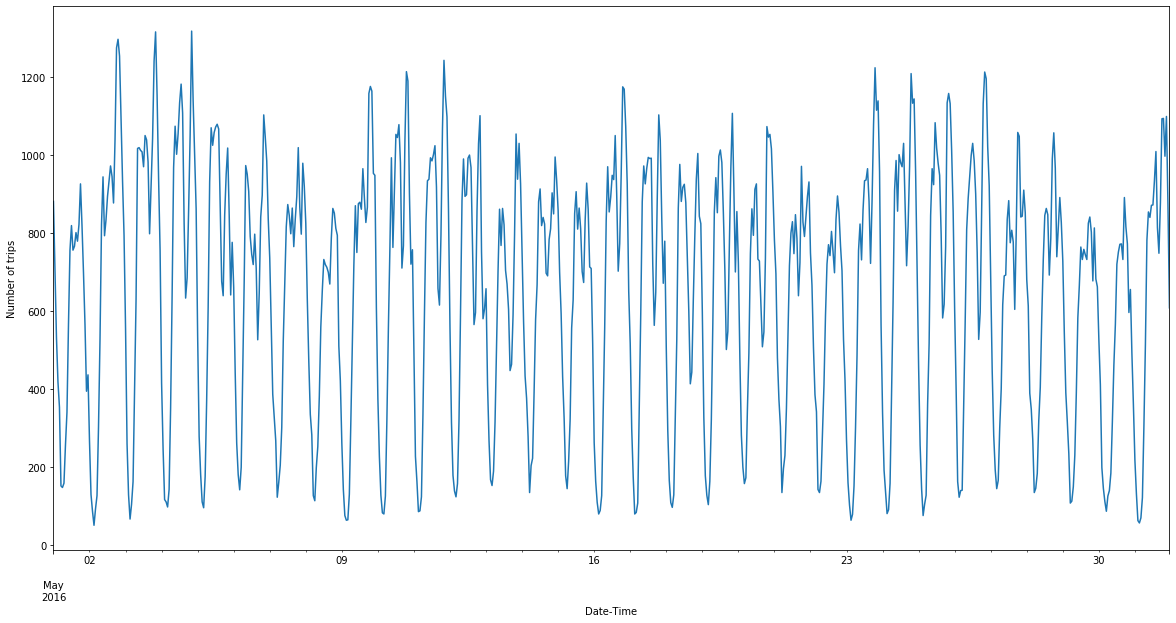

In [50]:
#координаты
ESB_longitude = -73.985774
ESB_latitude = 40.748635

#находим регион
ESB_region = list(regions[(ESB_longitude>=regions.west)&(ESB_longitude<=regions.east)
                          &(ESB_latitude>=regions.south)&(ESB_latitude<=regions.north)]['region'])[0]

#формируем таблицу для графика
plt.figure(figsize=(20, 10))
res[(res.region==ESB_region)].set_index(['tpep_pickup_datetime'],inplace=False)['cnt'].plot()
plt.ylabel('Number of trips')
plt.xlabel('Date-Time')

## №6 Считаем, сколько было пар час-ячейка без единой поездки

In [51]:
print(len(res[res.cnt==0].index))

1718238
